In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'C:\Computer Science\Cognifyz\Dataset.csv')

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# droping null values
df.dropna(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
# dropping columns which is least imp
df.drop(columns = ['Restaurant ID','Restaurant Name','Address','Locality','Longitude','Latitude','Locality Verbose','Rating color','Rating text','Country Code'],inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  9542 non-null   object 
 1   Cuisines              9542 non-null   object 
 2   Average Cost for two  9542 non-null   int64  
 3   Currency              9542 non-null   object 
 4   Has Table booking     9542 non-null   object 
 5   Has Online delivery   9542 non-null   object 
 6   Is delivering now     9542 non-null   object 
 7   Switch to order menu  9542 non-null   object 
 8   Price range           9542 non-null   int64  
 9   Aggregate rating      9542 non-null   float64
 10  Votes                 9542 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 894.6+ KB


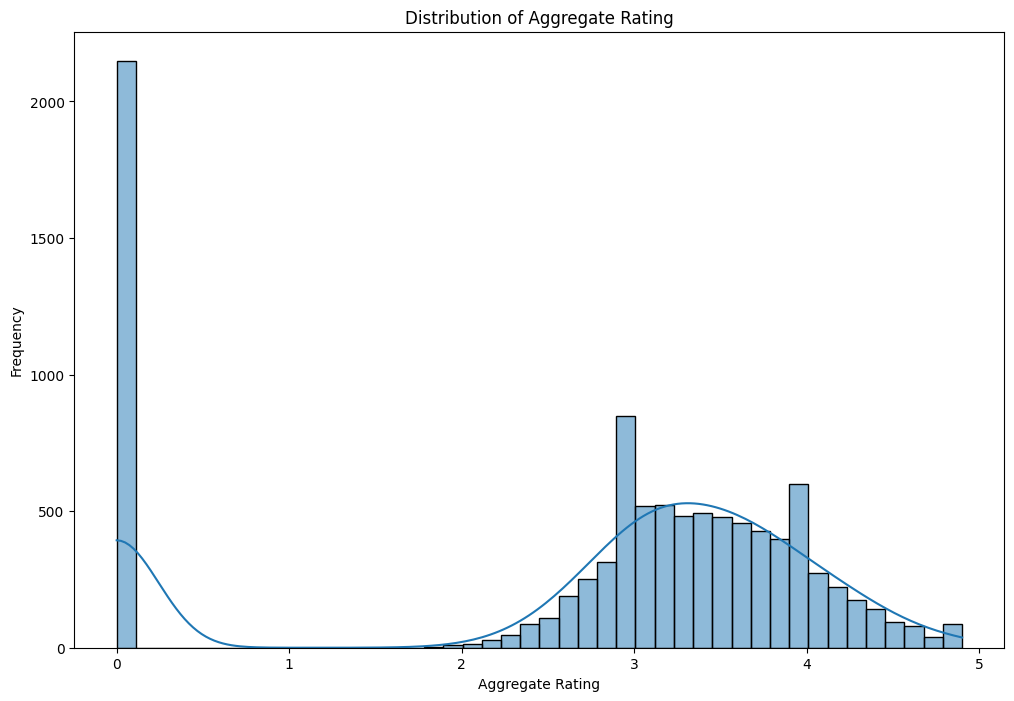

In [11]:

plt.figure(figsize = (12,8))
sns.histplot(df['Aggregate rating'],kde = True);
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Aggregate Rating");

The above graph shows the distribution of agggregate rating and we can observe that most of them have a rating in range 3 - 4

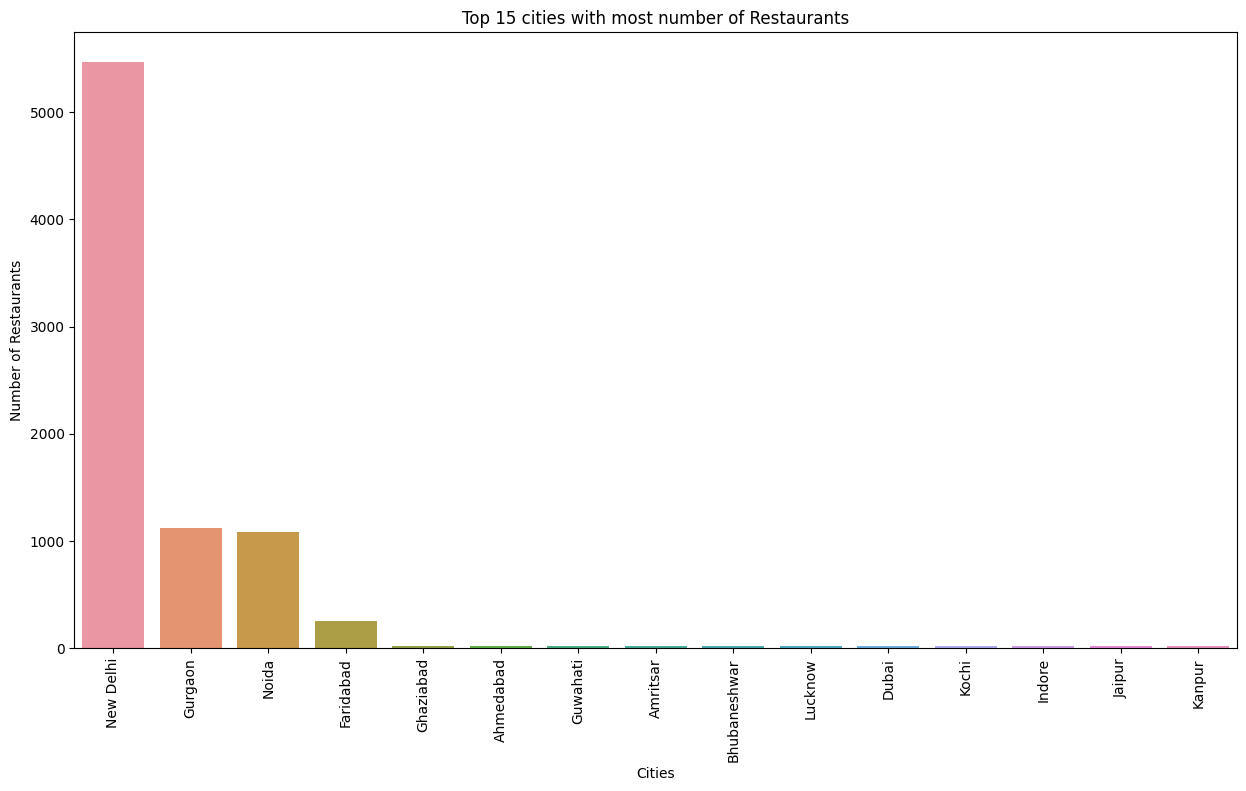

In [12]:
plt.figure(figsize = (15,8))
sns.barplot(x = df['City'].value_counts().index[0:15],y = df['City'].value_counts().values[0:15])
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Number of Restaurants")
plt.title("Top 15 cities with most number of Restaurants");

The above bar graph show the top 15 cities with most number of restaurants and New Delhi has most number of restaurants followed by Gurgaon and Noida

C:\Users\KIIT\AppData\Local\Temp\ipykernel_27700\2686564842.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Average Cost for two']);


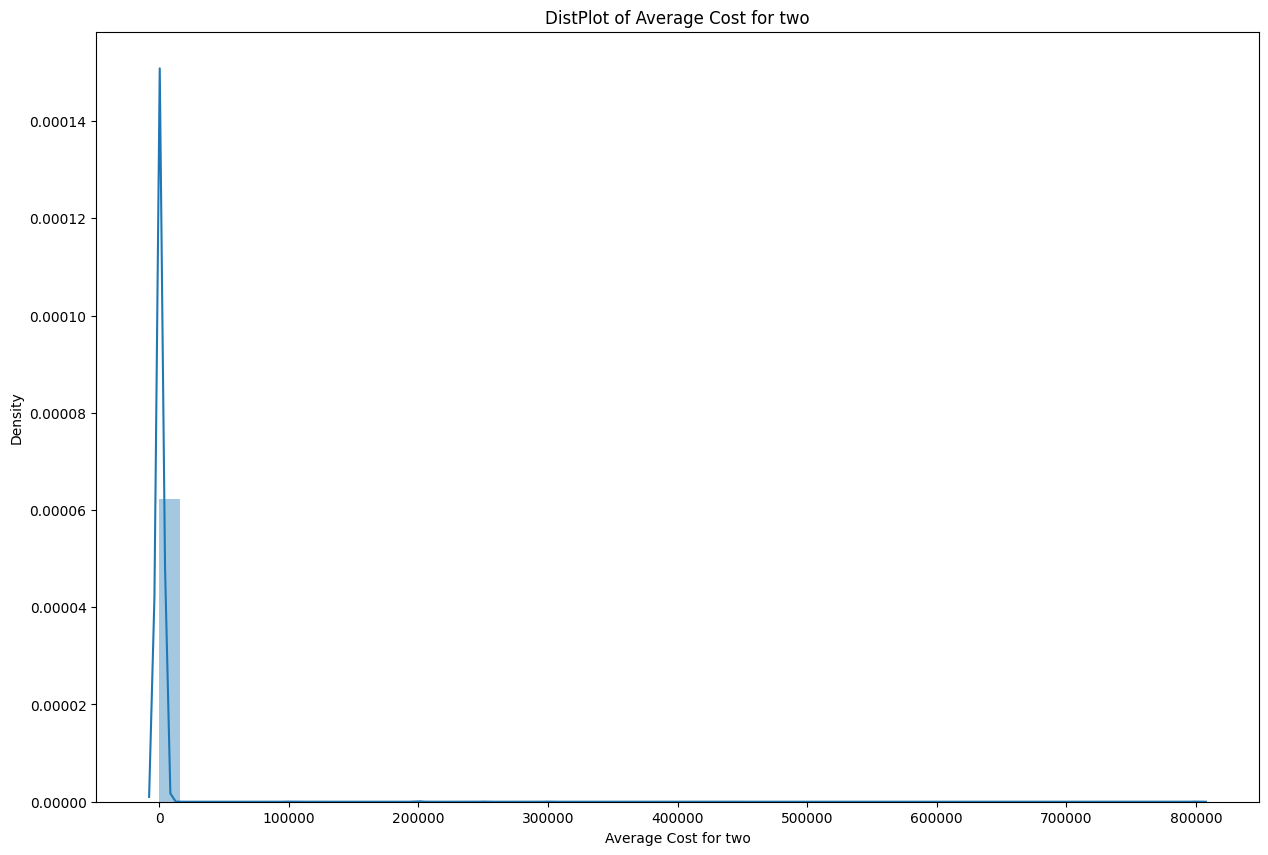

In [13]:
plt.figure(figsize = (15,10))
sns.distplot(df['Average Cost for two']);
plt.title("DistPlot of Average Cost for two");

The above graph shows the distplot of average cost for two

In [14]:
# cities with avg aggregate rating
cities_avg_rating = df.groupby('City')['Aggregate rating'].mean()
cities_avg_rating = pd.DataFrame(cities_avg_rating).reset_index()
cities_avg_rating = cities_avg_rating.sort_values("Aggregate rating",ascending = False)
cities_avg_rating[0:15]

,City,Aggregate rating
56,Inner City,4.900000
106,Quezon City,4.800000
73,Makati City,4.650000
94,Pasig City,4.633333
75,Mandaluyong City,4.625000
15,Beechworth,4.600000
67,London,4.535000
122,Taguig City,4.525000
121,Tagaytay City,4.500000
115,Secunderabad,4.500000


Inner city has the highest aggregate rating of 4.9 and the above table shows the top 15 city with highest aggregate rating

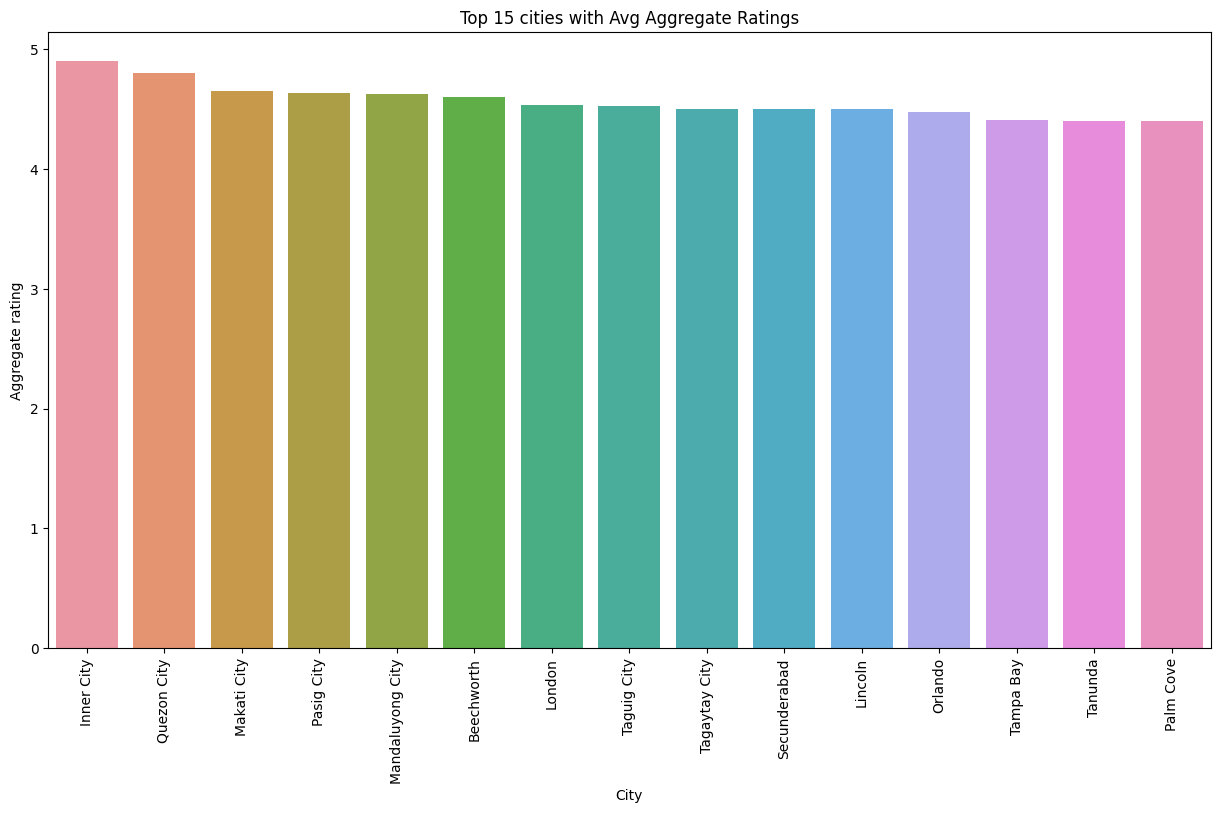

In [15]:
plt.figure(figsize = (15,8))
sns.barplot(x = cities_avg_rating['City'][0:15],y = cities_avg_rating['Aggregate rating'][0:15])
plt.xticks(rotation = 90)
plt.title("Top 15 cities with Avg Aggregate Ratings");

In [16]:
le = LabelEncoder()

In [17]:
# converting textual data into numeric basically in 1 or 0
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = le.fit_transform(df['Switch to order menu'])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_27700\499994970.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<AxesSubplot: >

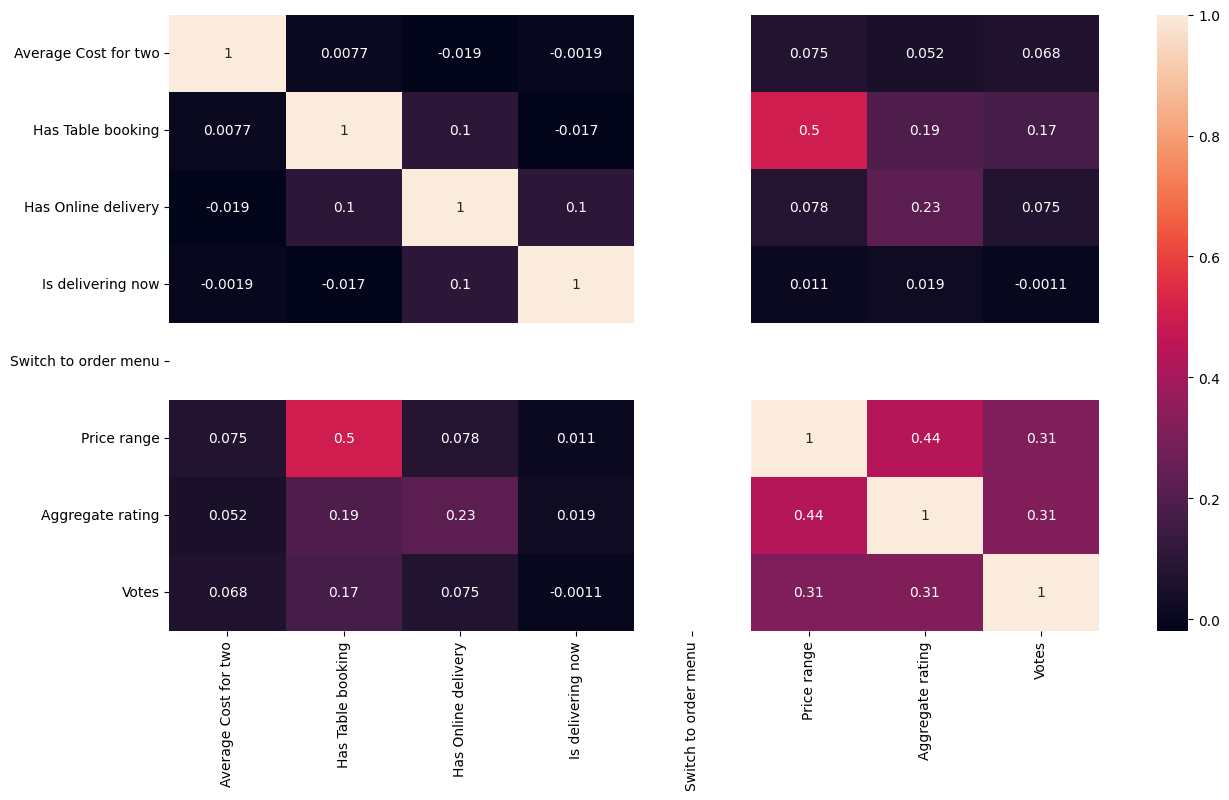

In [18]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True)

In [19]:
df

,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,314
1,Makati City,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,591
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,270
3,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,365
4,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,229
...,...,...,...,...,...,...,...,...,...,...,...
9546,��stanbul,Turkish,80,Turkish Lira(TL),0,0,0,0,3,4.1,788
9547,��stanbul,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),0,0,0,0,3,4.2,1034
9548,��stanbul,"Italian, World Cuisine",170,Turkish Lira(TL),0,0,0,0,4,3.7,661
9549,��stanbul,Restaurant Cafe,120,Turkish Lira(TL),0,0,0,0,4,4.0,901


In [20]:
x = df.drop(columns = ['Aggregate rating'])
y = df['Aggregate rating']

In [21]:
# num_col will have all the columns with numeric values and cat_col have categorical columns
num_col = []
cat_col = []
for col in x.columns:
    if df[col].dtype == 'O':
        cat_col.append(col)
    else:
        num_col.append(col)

In [22]:
cat_col

['City', 'Cuisines', 'Currency']

In [23]:
num_col

['Average Cost for two',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Votes']

In [24]:
# for numeric columns first SI will impute mean if null is there then value will be scaled for all the numeric columns
num_transformer = Pipeline(steps = [
    ('SI',SimpleImputer(strategy = 'mean')),
    ('Scaling',StandardScaler())
])

In [25]:
# for categorical columns first SI will impute null value with Mode of the columns and then OHE will happen to convert text data into numeric data
cat_transformer = Pipeline(steps=[
    ('SI',SimpleImputer(strategy = 'most_frequent')),
    ('Encode',OneHotEncoder(handle_unknown='ignore')),
    
])

In [26]:
transformer = ColumnTransformer(transformers = [
    ('tnf1',num_transformer,num_col),
    ('tnf2',cat_transformer,cat_col)
])

In [27]:
x_see = transformer.fit_transform(x)

In [28]:
x_see.shape

(9542, 1984)

In [29]:
pd.DataFrame(x_see)

,0
0,"(0, 0)\t-0.006220657687094799\n (0, 1)\t2.6..."
1,"(0, 0)\t-2.0221920045122938e-05\n (0, 1)\t2..."
2,"(0, 0)\t0.1735919795573458\n (0, 1)\t2.6907..."
3,"(0, 0)\t0.018581085381103903\n (0, 1)\t-0.3..."
4,"(0, 0)\t0.018581085381103903\n (0, 1)\t2.69..."
...,...
9537,"(0, 0)\t-0.06946510251100149\n (0, 1)\t-0.3..."
9538,"(0, 0)\t-0.06791499356923907\n (0, 1)\t-0.3..."
9539,"(0, 0)\t-0.06388471032065678\n (0, 1)\t-0.3..."
9540,"(0, 0)\t-0.06698492820418162\n (0, 1)\t-0.3..."


In [30]:
pd.DataFrame(x_see.toarray())

,0,1,2,3,4,5,6,7,8,9,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983
0,-0.006221,2.690738,-0.58792,-0.059799,0.0,1.319726,0.365493,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.000020,2.690738,-0.58792,-0.059799,0.0,1.319726,1.009408,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.173592,2.690738,-0.58792,-0.059799,0.0,2.424069,0.263210,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.018581,-0.371645,-0.58792,-0.059799,0.0,2.424069,0.484048,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.018581,2.690738,-0.58792,-0.059799,0.0,2.424069,0.167901,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,-0.069465,-0.371645,-0.58792,-0.059799,0.0,1.319726,1.467355,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9538,-0.067915,-0.371645,-0.58792,-0.059799,0.0,1.319726,2.039208,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9539,-0.063885,-0.371645,-0.58792,-0.059799,0.0,2.424069,1.172130,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9540,-0.066985,-0.371645,-0.58792,-0.059799,0.0,2.424069,1.730035,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_see,y,test_size = 0.2,random_state = 42)

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
Y_predd = lr.predict(x_test)

In [36]:
Y_predd

array([2.88707111, 2.73668049, 2.31742281, ..., 1.7843225 , 1.72267178,
       1.9272223 ])

In [37]:
mean_squared_error(y_test,Y_predd)

1.5084785652056887

In [38]:
r2_score(y_test,Y_predd)

0.3412849983265571

We are not getting good score from Linear Regression lets try some other algorithms like Random Forest Regressor

In [39]:
y_test

7142    0.0
1860    4.1
4425    3.3
3219    3.9
8308    0.0
       ... 
5612    0.0
4061    0.0
8746    0.0
7678    0.0
4430    3.3
Name: Aggregate rating, Length: 1909, dtype: float64

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
model2 = Pipeline(steps=[
    ('preprocessor', transformer),
    ('regressor',RandomForestRegressor(random_state = 42))
])

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [43]:
model2.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tnf1',
                                                  Pipeline(steps=[('SI',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Average Cost for two',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Price range', 'Votes']),
                                                 ('tnf2',
                                                  Pipeline(steps=[('SI',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Cuisines',
                                                   'Currency'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [44]:
y_pred2 = model2.predict(x_test)

In [45]:
mean_squared_error(y_test,y_pred2)

0.10103117059743529

In [46]:
r2_score(y_test,y_pred2)

0.9558822052601822

After using RandomForestRegressor as a algorithm we achived a 95% score which is preety good so we are ready with our model2 as our final model